<h2>Linear Reggression</h2>

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

In [5]:
df = pd.read_csv("BostonHousing.csv")

In [6]:
df.head()

,Crime_rate,zn,indus,chas,nox,rm,Age,Distance,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
df.isnull().sum()

Crime_rate    0
zn            0
indus         0
chas          0
nox           0
rm            5
Age           0
Distance      0
rad           0
tax           0
ptratio       0
b             0
lstat         0
medv          0
dtype: int64

In [10]:
df['rm'].fillna(df['rm'].mean())

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: rm, Length: 506, dtype: float64

In [11]:
df.isnull().sum()

Crime_rate    0
zn            0
indus         0
chas          0
nox           0
rm            0
Age           0
Distance      0
rad           0
tax           0
ptratio       0
b             0
lstat         0
medv          0
dtype: int64

__Performing Reggression__

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [18]:
#Split into feature and target variable
X = df.drop(columns=['medv'])
Y = df['medv']

In [20]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(379, 13)
(127, 13)
(379,)
(127,)


In [23]:
#Linear Regression
linearmodel = LinearRegression()
linearmodel.fit(X_train,Y_train)
Y_pred = linearmodel.predict(X_test)

In [28]:
linearmodel.score(X_test,Y_test)

0.6831144311098879

In [35]:
#printnig MSE Score
mse = mean_squared_error(Y_test,Y_pred)
print("MSE :",mse)

#printing the rmse score, average of squared differences bet pred and true vals
rmse = math.sqrt(mse)
print("RMSE :",rmse)

#printing the r2 score , it indicates the goodness of fit of model, larger the better
r2sc = r2_score(Y_test,Y_pred)
print("R2 Score :",r2sc)

MSE : 22.190591254638434
RMSE : 4.7106890424478705
R2 Score : 0.6831144311098879


In [43]:
#printing the intercept value of target when independent/feature is zero
intercept = linearmodel.intercept_
print("Intercept :",intercept)

#printing the coefficient change in the dependant/target for one unit change in independant var, holding all other independant vars constant
coef = linearmodel.coef_[0]
print("Coeffient / Slope :",coef) #Negative Relationship

Intercept : 29.882551775956813
Coeffient / Slope : -0.12830877654791664


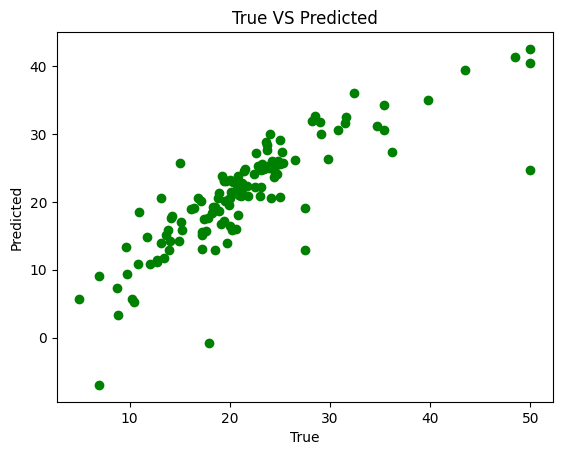

In [49]:
plt.scatter(Y_test,Y_pred,c='green')
plt.title("True VS Predicted")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

In [50]:
#printning the correlation matrix
df.corr()

,Crime_rate,zn,indus,chas,nox,rm,Age,Distance,rad,tax,ptratio,b,lstat,medv
Crime_rate,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219261,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.310847,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.392052,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091434,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302051,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219261,0.310847,-0.392052,0.091434,-0.302051,1.000000,-0.239632,0.202268,-0.210353,-0.292178,-0.356065,0.127998,-0.614526,0.695375
Age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.239632,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
Distance,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.202268,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.210353,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292178,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<Axes: >

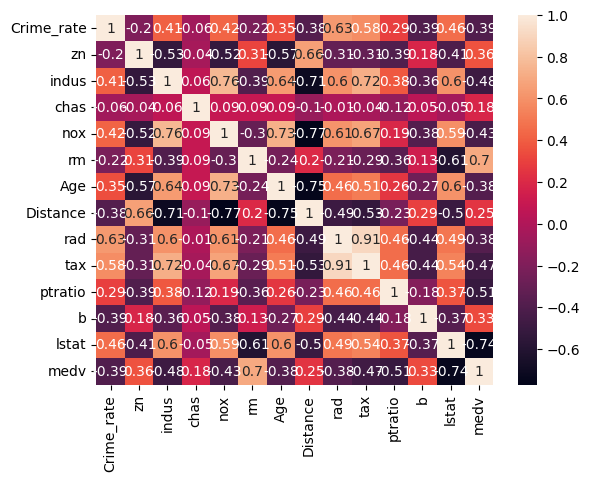

In [55]:
correlation_matrix = df.corr().round(2)
sns.heatmap(data = correlation_matrix, annot = True)